In [144]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
import os
from tqdm.notebook import tqdm 
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
from random import choice

In [2]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B


def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

장르에서 단어 추출 및 word2vec.

In [4]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [51]:
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]: 
                res.append(w[0])
        tokenized.append(res)

In [52]:
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0) 

In [149]:
model.wv.most_similar(positive=['영화'])

[('작품', 0.8841354846954346),
 ('다큐멘터리', 0.8705189824104309),
 ('드라마', 0.8271274566650391),
 ('영화로', 0.8093018531799316),
 ('소재', 0.8019960522651672),
 ('주제', 0.7999787926673889),
 ('형식', 0.794220507144928),
 ('에마데딘', 0.7803788781166077),
 ('감동', 0.7772049307823181),
 ('코미디', 0.7760371565818787)]

In [150]:
model.wv.most_similar(positive=['사랑'])

[('토마슈', 0.7481025457382202),
 ('행복', 0.714691698551178),
 ('애정', 0.7137567400932312),
 ('진심', 0.7071815729141235),
 ('첫사랑', 0.695979118347168),
 ('운명', 0.6810238361358643),
 ('연애', 0.6777120232582092),
 ('실연', 0.6732856631278992),
 ('만남', 0.6701118350028992),
 ('이별', 0.6698381304740906)]

In [151]:
model.wv.most_similar(positive=['연극'])

[('영화감독', 0.8958593010902405),
 ('영감', 0.884290874004364),
 ('시나리오', 0.8832041621208191),
 ('배우', 0.8814992904663086),
 ('예술가', 0.8786024451255798),
 ('대본', 0.8679270148277283),
 ('캐스팅', 0.8594512939453125),
 ('오페라', 0.8590832352638245),
 ('시리즈', 0.8587775230407715),
 ('데뷔', 0.8551801443099976)]

In [193]:
def read_token(file_name,tokenized): #word2vec 학습을 위해 만드는 tokenized:list 이지만 시간이 오래걸려 쓰지 않음.
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"] and word[0] in model.wv:
                    result.append((word[0]))
            tokenized.append(result)
    return ' '.join(result)

In [194]:
def read_token_orig(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:
                    result.append((word[0]))
    return ' '.join(result)

In [ ]:
def embed(list_genre,model = model):
    return np.array([model.wv[x] for x in list_genre])

In [91]:
tokenized_genre = {}
tokenized = []
for genre, txt in tqdm(zip(genre_name,genre_txt),total=len(genre_name)):
    tokenized_genre[genre] = read_token(txt,tokenized)

  0%|          | 0/21 [00:00<?, ?it/s]

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [15]:
#model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  #너무 오래 걸림

In [92]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(list(tokenized_genre.values()))

In [ ]:
del tokenized_genre
del tokenized

In [113]:
w_genre = {}
total_word = defaultdict(int)
for genre, tfidv in tqdm(zip(genre_name,X),total = len(genre_name)):
    w_genre[genre] = [[i, j] for i, j in zip(tfidv.tocoo().col, tfidv.tocoo().data)]
    w_genre[genre].sort(key=lambda x: x[1], reverse=True)
    w_genre[genre] = w_genre[genre][0:70]
    for for_data in w_genre[genre]:
        total_word[for_data[0]] +=1

  0%|          | 0/21 [00:00<?, ?it/s]

In [120]:
re_w = defaultdict(list)
max_len =0
min_len =20
for for_name,for_genre in tqdm(w_genre.items()):
    for for_data in for_genre:
        if total_word[for_data[0]]<5:
            re_w[for_name].append(vectorizer.get_feature_names()[for_data[0]])
    max_len = max(max_len,len(re_w[for_name]))
    min_len = min(min_len,len(re_w[for_name]))

  0%|          | 0/21 [00:00<?, ?it/s]

In [115]:
max_len

58

In [116]:
min_len

16

In [121]:
re_w={k:embed(x[0:16]) for k,x in re_w.items()}

In [124]:
print(len(re_w))

21


In [122]:
weat_score(re_w[genre_name[0]],re_w[genre_name[1]],re_w[genre_name[2]],re_w[genre_name[3]])

-0.3890642

상업,예술 영화 단어가져오기

In [195]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

art = read_token_orig(art_txt)
gen = read_token_orig(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [196]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

In [197]:
m1 = X[0].tocoo() 
m2 = X[1].tocoo()

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)
w2.sort(key=lambda x: x[1], reverse=True) 

In [198]:
n = 16
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break
        
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

In [199]:
def draw_hitmap():
    matrix = np.array([[0.0 for _ in range(len(genre_name))] for _ in range(len(genre_name))])
    
    for i in range(len(genre_name)-1):
        for j in range(i+1, len(genre_name)):
            A=re_w[genre_name[i]]
            B=re_w[genre_name[j]]
            matrix[i][j] = weat_score(X, Y, A, B)
            

    sns.set(rc={'figure.figsize':(15.0,15.0)})
    sns.set(font='NanumGothic')
    plt.rcParams['axes.unicode_minus'] = False

    ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
    ax
    return matrix

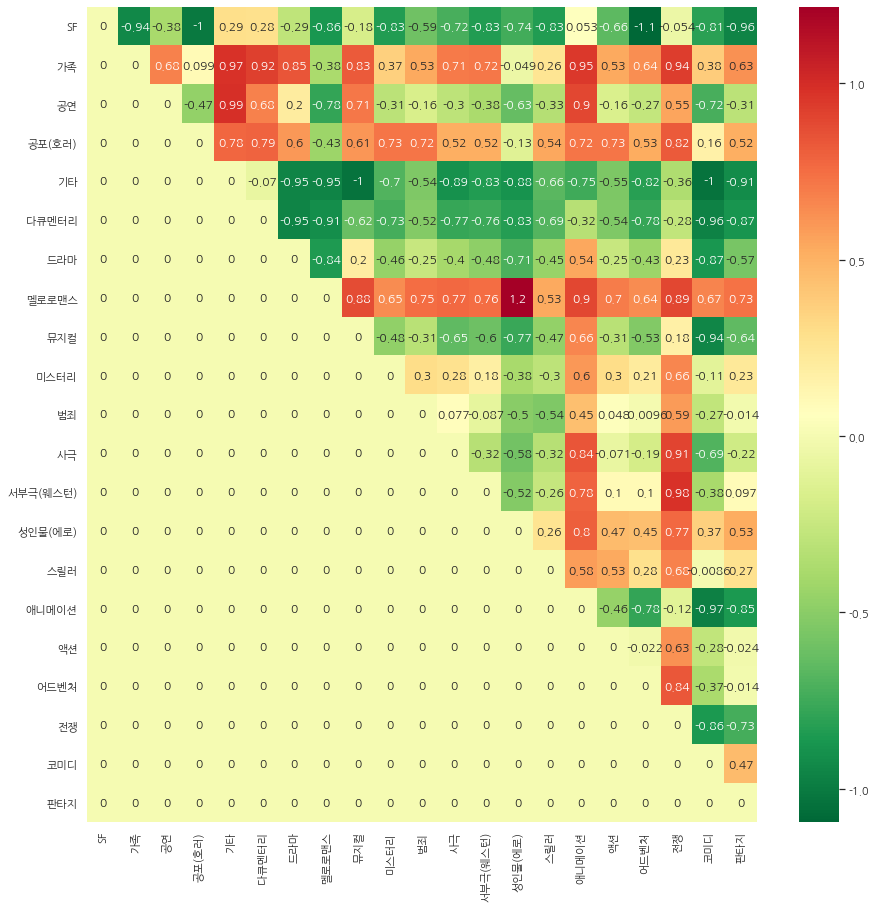

In [200]:
a=draw_hitmap()

모델(word2vec)을 전체 데이터로 학습시 너무 오래걸림, 하여 synopsis.txt로 학습 후 vocab에 없는 단어로 Tfidf(순서를 바꿀 경우 중복단어 4개 이하의 경우 단어 수가 반절로 줄어듬) 중복을 모두 제거 할 경우 남는 단어가 매우 적기 때문에 겹치는 단어의 개수가 4개 이하로 설정하여 진행.
np.random.seed(0)은 왜들어가는가? 필요없는듯.

왜 개별축으로 하지 않고 축 2개를 이용하는가? 축 2개를 이용하는데 왜 2차원으로 계산하지않고 1차원으로 계산하는가?